# 테크 크런치에서 10페이지의 기사 읽어오기

In [1]:
import requests
import lxml.html

### 기사 목록 가져오는 함수

In [2]:
page = 2
'https://techcrunch.com/startups/page/{}/'.format(page)

'https://techcrunch.com/startups/page/2/'

In [3]:
# Generator
def get_tc_list(page):
    """각 page에 있는 기사 제목을 가져온다"""
    url = 'https://techcrunch.com/startups/page/{}/'.format(page)  # URL 만들기
    res = requests.get(url)  # 기사 목록 가져오기
    root = lxml.html.fromstring(res.text)  # HTML 파싱
    titles = root.cssselect('h2 a')  # 제목 가져오기
    for title in titles:
        yield title.text

In [4]:
# 1 page 기사 리스트
list(get_tc_list(1))

['Get your pitch applications in for the Boulder\xa0Micro-Meetup',
 'What do you want to ask SoFi CEO Mike Cagney at Disrupt\xa0NY?',
 'Equity Podcast: Apple and Amazon buy more companies, and Uber’s\xa0saga',
 'Instacart agreed to settle a class-action lawsuit for $4.6\xa0million',
 'Zero Motorcycles CTO Abe Askenazi on the future of two-wheeled\xa0EVs',
 'Post Intelligence says it can make your tweets\xa0better',
 'How Everette Taylor went from a homeless college dropout to chief marketing officer at\xa0Skurt',
 'Revolut launches a premium subscription and starts raising a new\xa0round',
 'Zenreach raises $30M to help businesses boost their marketing with free\xa0Wi-Fi',
 'CALA’s app fits designer clothing to your body using iPhone\xa0photos',
 'A new app lets you list and\xa0Shout',
 'Years after crashing on Travis Kalanick’s couch, this founder has raised $18M for his startup,\xa0Mashape',
 'Lystable takes $10M top-up to tackle freelancer\xa0payments',
 'Italy’s MotorK, a company t

### TQDM
진행 막대(pregress bar)를 보여주는 라이브러리. conda install tqdm.

In [5]:
import tqdm

### 기사 수집

In [7]:
articles = []

for page in tqdm.tqdm_notebook(range(1, 31)):  # 1부터 30까지
    articles = articles + list(get_tc_list(page))

In [8]:
len(articles)

600

In [25]:
articles[0]

'Get your pitch applications in for the Boulder\xa0Micro-Meetup'

## TDM (Term Document Matrix)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
cv = CountVectorizer(max_features=2000, stop_words='english')  

# max_features : 최대 단어 갯수
# stop_words : 제외할 단어 목록 (a, the, of 등을 제외할 단어 내장)

In [57]:
tdm = cv.fit_transform(articles)

In [58]:
words = cv.get_feature_names()

In [59]:
words[100:130]

['acquire',
 'acquired',
 'acquires',
 'acquisition',
 'acquisitions',
 'action',
 'ad',
 'adam',
 'adapter',
 'add',
 'additional',
 'addresses',
 'adds',
 'adelphic',
 'ads',
 'adult',
 'advertising',
 'aerial',
 'aes',
 'affordable',
 'africa',
 'agency',
 'agent',
 'aggregates',
 'aging',
 'agreed',
 'agriculture',
 'ai',
 'aimed',
 'aiming']

In [60]:
count_mat = tdm.sum(axis=0)   # column별 합계. 단어별 사용 횟수
count_mat

matrix([[2, 2, 2, ..., 2, 1, 1]], dtype=int64)

In [61]:
import numpy

In [62]:
count = numpy.squeeze(numpy.asarray(count_mat))   # matrix --> array
count

array([2, 2, 2, ..., 2, 1, 1], dtype=int64)

In [63]:
word_count = list(zip(words, count))
word_count[100:130]

[('acquire', 3),
 ('acquired', 2),
 ('acquires', 21),
 ('acquisition', 3),
 ('acquisitions', 1),
 ('action', 1),
 ('ad', 7),
 ('adam', 1),
 ('adapter', 1),
 ('add', 2),
 ('additional', 1),
 ('addresses', 1),
 ('adds', 10),
 ('adelphic', 1),
 ('ads', 3),
 ('adult', 1),
 ('advertising', 1),
 ('aerial', 1),
 ('aes', 1),
 ('affordable', 4),
 ('africa', 2),
 ('agency', 1),
 ('agent', 1),
 ('aggregates', 1),
 ('aging', 2),
 ('agreed', 1),
 ('agriculture', 1),
 ('ai', 24),
 ('aimed', 3),
 ('aiming', 1)]

In [64]:
import operator

In [65]:
word_count = sorted(             # 정렬
    word_count,
    key=operator.itemgetter(1),  # 1번째(빈도)를 기준으로
    reverse=True)                # 내림차순으로

In [66]:
word_count[:30]

[('raises', 81),
 ('million', 67),
 ('startup', 63),
 ('new', 49),
 ('app', 45),
 ('startups', 35),
 ('tech', 26),
 ('ai', 24),
 ('launches', 23),
 ('wants', 23),
 ('platform', 22),
 ('acquires', 21),
 ('help', 20),
 ('mobile', 18),
 ('series', 18),
 ('service', 18),
 ('data', 15),
 ('media', 15),
 ('make', 14),
 ('meetup', 14),
 ('uk', 14),
 ('founder', 13),
 ('fund', 13),
 ('company', 12),
 ('meet', 12),
 ('search', 12),
 ('smart', 12),
 ('5m', 11),
 ('companies', 11),
 ('day', 11)]

## 워드 클라우드

* [Unofficial Windows Binaries for Python Extension Packages](http://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud)에서 
wordcloud-1.2.1-cpXX-cpXXm-win_amdXX.whl를 다운받은 다음, 명령창에서 아래 명령을 실행:
* 자신의 Python 버전과 운영체제 bit에맞게 다운로드

$ cd c:\Downloads

$ pip install wordcloud-1.3.1-cp35-cp35m-win_amd64.whl

In [71]:
%matplotlib inline
from matplotlib import pyplot

In [72]:
from wordcloud import WordCloud

In [73]:
wc = WordCloud(background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(dict(word_count))

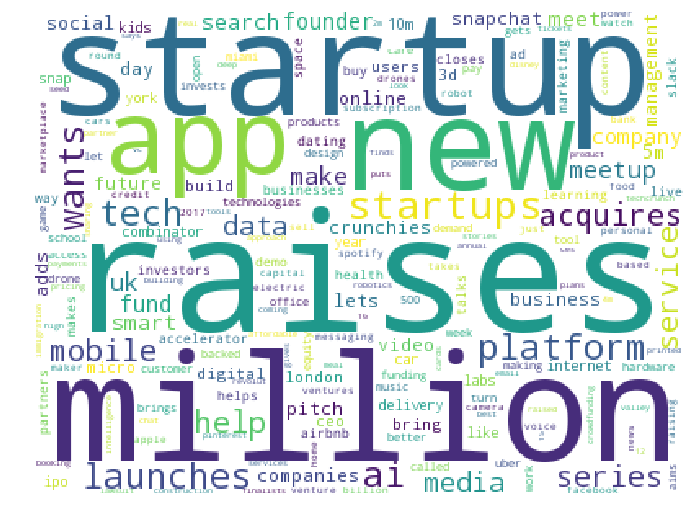

In [74]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

## 상관 행렬 만들기

In [75]:
word_corr = numpy.corrcoef(tdm.todense(), rowvar=0)
word_corr

array([[ 1.        , -0.00236293, -0.00236293, ..., -0.00236293,
        -0.00166945, -0.00166945],
       [-0.00236293,  1.        , -0.00334448, ..., -0.00334448,
        -0.00236293, -0.00236293],
       [-0.00236293, -0.00334448,  1.        , ..., -0.00334448,
        -0.00236293, -0.00236293],
       ..., 
       [-0.00236293, -0.00334448, -0.00334448, ...,  1.        ,
        -0.00236293, -0.00236293],
       [-0.00166945, -0.00236293, -0.00236293, ..., -0.00236293,
         1.        , -0.00166945],
       [-0.00166945, -0.00236293, -0.00236293, ..., -0.00236293,
        -0.00166945,  1.        ]])

In [76]:
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        edges.append((words[i], words[j], word_corr[i, j]))

In [81]:
edges = sorted(edges, key=operator.itemgetter(2), reverse=True)

In [80]:
edges = edges[:30]
edges

[('10k', 'aarp', 1.0),
 ('10k', 'dangles', 1.0),
 ('10k', 'population', 1.0),
 ('10th', 'annual', 1.0),
 ('12bn', 'invested', 1.0),
 ('13', 'akeneo', 1.0),
 ('149', 'doctor', 1.0),
 ('14m', 'edge', 1.0),
 ('14m', 'neurala', 1.0),
 ('150', 'sosv', 1.0),
 ('170m', 'digs', 1.0),
 ('170m', 'tip', 1.0),
 ('170m', 'uganda', 1.0),
 ('17m', 'atomico', 1.0),
 ('17m', 'pipedrive', 1.0),
 ('17m', 'smbs', 1.0),
 ('183', 'decentralize', 1.0),
 ('183', 'k2', 1.0),
 ('183', 'road', 1.0),
 ('183', 'sand', 1.0),
 ('18m', 'couch', 1.0),
 ('18m', 'crashing', 1.0),
 ('18m', 'travis', 1.0),
 ('18th', 'organize', 1.0),
 ('18th', 'reverend', 1.0),
 ('18th', 'unstructured', 1.0),
 ('19', 'confirmed', 1.0),
 ('19', 'planned', 1.0),
 ('20', 'tier', 1.0),
 ('2000', 'annealing', 1.0)]

In [83]:
edge_list = [(word1, word2) for word1, word2, weight in edges]
edge_list

[('10k', 'aarp'),
 ('10k', 'dangles'),
 ('10k', 'population'),
 ('10th', 'annual'),
 ('12bn', 'invested'),
 ('13', 'akeneo'),
 ('149', 'doctor'),
 ('14m', 'edge'),
 ('14m', 'neurala'),
 ('150', 'sosv'),
 ('170m', 'digs'),
 ('170m', 'tip'),
 ('170m', 'uganda'),
 ('17m', 'atomico'),
 ('17m', 'pipedrive'),
 ('17m', 'smbs'),
 ('183', 'decentralize'),
 ('183', 'k2'),
 ('183', 'road'),
 ('183', 'sand'),
 ('18m', 'couch'),
 ('18m', 'crashing'),
 ('18m', 'travis'),
 ('18th', 'organize'),
 ('18th', 'reverend'),
 ('18th', 'unstructured'),
 ('19', 'confirmed'),
 ('19', 'planned'),
 ('20', 'tier'),
 ('2000', 'annealing')]

In [84]:
weight_list = [weight for word1, word2, weight in edges]
weight_list

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [85]:
import networkx

In [86]:
G = networkx.Graph()

edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)
    edge_set.add((word1, word2))

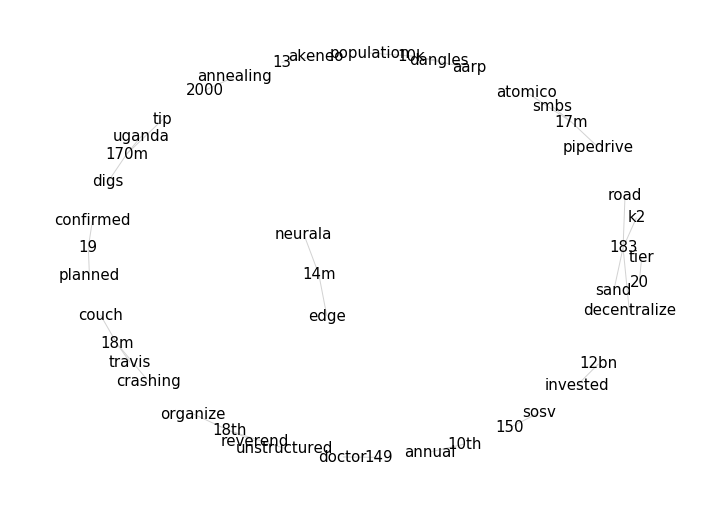

In [87]:
position = networkx.spring_layout(G, k=0.09,  iterations=100)
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray')
networkx.draw_networkx_labels(G, position, font_size=15)
pyplot.axis('off')
pyplot.show()